In [2]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
average_values = {
    'maize': {'N': 120, 'P': 60, 'K': 40, 'temperature': 28, 'humidity': 60, 'ph': 6.5, 'rainfall': 200},
    'wheat' : {'N': 80, 'P': 40, 'K': 40, 'temperature':23 , 'humidity': 55, 'ph': 6, 'rainfall': 150}
}
data = []
for label, values in average_values.items():
    for _ in range(3000):
        entry = {feature: np.random.normal(value, value * 0.1) for feature, value in values.items()}
        entry['label'] = label
        data.append(entry)
custom_dataset = pd.DataFrame(data)
custom_dataset = custom_dataset.sample(frac=1).reset_index(drop=True)
print(custom_dataset)

               N          P          K  temperature   humidity        ph  \
0      78.021582  34.572664  44.064273    21.652174  48.492436  4.963859   
1      76.961199  36.195473  35.781468    24.597065  52.127516  5.644691   
2      83.359704  44.409947  38.142625    23.406955  63.938060  5.432612   
3      79.729393  39.614023  42.074944    23.466298  54.673872  6.608291   
4      79.944213  34.617781  46.781261    21.847460  52.352216  6.383821   
...          ...        ...        ...          ...        ...       ...   
5995  132.323236  61.716476  38.014432    31.442674  58.992823  5.332681   
5996  106.712325  65.094716  37.359759    26.622436  72.502752  6.511796   
5997  124.956116  60.097077  40.396007    27.755605  58.893501  6.339689   
5998  124.826328  51.648210  39.004803    27.748107  48.356263  5.717571   
5999   97.419256  57.648910  42.509764    33.557714  64.071897  6.948557   

        rainfall  label  
0     159.205776  wheat  
1     173.383189  wheat  
2     155

In [4]:
custom_dataset.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,78.021582,34.572664,44.064273,21.652174,48.492436,4.963859,159.205776,wheat
1,76.961199,36.195473,35.781468,24.597065,52.127516,5.644691,173.383189,wheat
2,83.359704,44.409947,38.142625,23.406955,63.938060,5.432612,155.124912,wheat
3,79.729393,39.614023,42.074944,23.466298,54.673872,6.608291,120.825646,wheat
4,79.944213,34.617781,46.781261,21.847460,52.352216,6.383821,146.619124,wheat
5,86.099413,44.426671,34.204061,23.299190,50.586445,5.753836,159.251330,wheat
6,90.553310,37.843780,35.790067,19.996652,55.510234,7.122564,149.359570,wheat
7,74.085681,37.633586,36.680700,20.831584,51.310453,6.054746,164.796119,wheat
8,82.995876,43.075722,48.774583,25.104463,55.675977,6.179183,133.503241,wheat
9,93.005719,63.568588,31.039612,32.543785,56.586909,7.276048,210.478823,maize


In [5]:
df = pd.DataFrame(data)

# Shuffle the DataFrame (optional)
df = df.sample(frac=1).reset_index(drop=True)

# Save the DataFrame to a CSV file
df.to_csv('north_dataset.csv', index=False)

print("DataFrame saved to north_dataset.csv")

DataFrame saved to north_dataset.csv


In [6]:
custom_dataset.size

48000

In [7]:
custom_dataset.max()

N              159.868518
P               82.879871
K               55.921115
temperature     36.597403
humidity        79.863242
ph               8.552535
rainfall       267.809391
label               wheat
dtype: object

In [8]:
new_df = custom_dataset
new_df.reset_index(drop=True, inplace=True)
print(new_df)

               N          P          K  temperature   humidity        ph  \
0      78.021582  34.572664  44.064273    21.652174  48.492436  4.963859   
1      76.961199  36.195473  35.781468    24.597065  52.127516  5.644691   
2      83.359704  44.409947  38.142625    23.406955  63.938060  5.432612   
3      79.729393  39.614023  42.074944    23.466298  54.673872  6.608291   
4      79.944213  34.617781  46.781261    21.847460  52.352216  6.383821   
...          ...        ...        ...          ...        ...       ...   
5995  132.323236  61.716476  38.014432    31.442674  58.992823  5.332681   
5996  106.712325  65.094716  37.359759    26.622436  72.502752  6.511796   
5997  124.956116  60.097077  40.396007    27.755605  58.893501  6.339689   
5998  124.826328  51.648210  39.004803    27.748107  48.356263  5.717571   
5999   97.419256  57.648910  42.509764    33.557714  64.071897  6.948557   

        rainfall  label  
0     159.205776  wheat  
1     173.383189  wheat  
2     155

In [9]:
new_df.max()

N              159.868518
P               82.879871
K               55.921115
temperature     36.597403
humidity        79.863242
ph               8.552535
rainfall       267.809391
label               wheat
dtype: object

In [10]:
new_df.size

48000

In [11]:
new_df.shape

(6000, 8)

In [12]:
new_df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [13]:
new_df['label'].unique()

array(['wheat', 'maize'], dtype=object)

In [14]:
new_df.dtypes

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [15]:
new_df['label'].value_counts()

wheat    3000
maize    3000
Name: label, dtype: int64

<AxesSubplot: >

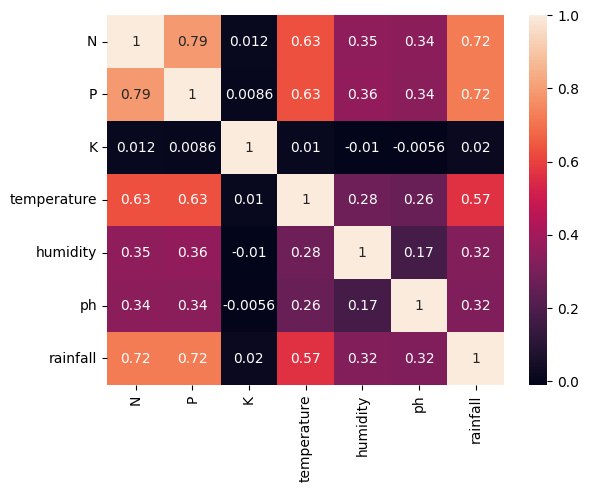

In [16]:
sns.heatmap(new_df.corr(),annot=True)

### Seperating features and target label

In [17]:
df = new_df

In [18]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [19]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [20]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [21]:
Xtrain.size, Xtest.size

(33600, 8400)

# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  99.75
              precision    recall  f1-score   support

       maize       1.00      1.00      1.00       612
       wheat       0.99      1.00      1.00       588

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [25]:
score

array([0.99833333, 0.99666667, 0.99666667, 0.99583333, 0.99833333])

### Saving trained Decision Tree model

In [52]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9983333333333333
              precision    recall  f1-score   support

       maize       1.00      1.00      1.00       612
       wheat       1.00      1.00      1.00       588

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [27]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99916667, 1.        , 1.        , 0.99916667, 0.99916667])

### Saving trained Guassian Naive Bayes model

In [28]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [29]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.85
              precision    recall  f1-score   support

       maize       0.77      1.00      0.87       612
       wheat       1.00      0.69      0.82       588

    accuracy                           0.85      1200
   macro avg       0.89      0.85      0.85      1200
weighted avg       0.88      0.85      0.85      1200



In [30]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.8225    , 0.81666667, 0.825     , 0.81333333, 0.8275    ])

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9983333333333333
              precision    recall  f1-score   support

       maize       1.00      1.00      1.00       612
       wheat       1.00      1.00      1.00       588

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [32]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.99916667, 1.        , 0.98166667, 0.98166667, 1.        ])

### Saving trained Logistic Regression model

In [33]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

NameError: name 'DT_pkl_filename' is not defined

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9975
              precision    recall  f1-score   support

       maize       1.00      1.00      1.00       612
       wheat       0.99      1.00      1.00       588

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [35]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99916667, 0.99916667, 1.        , 0.99833333, 0.99916667])

### Saving trained Random Forest model

In [36]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest_North.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [37]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on the target variable
label_encoder.fit(Ytrain)

# Transform both Ytrain and Ytest
Ytrain_encoded = label_encoder.transform(Ytrain)
Ytest_encoded = label_encoder.transform(Ytest)

# Now train your XGBoost classifier
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

# Predict using the trained model
predicted_values = XB.predict(Xtest)

# Calculate accuracy
x = metrics.accuracy_score(Ytest_encoded, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

# Print classification report
print(classification_report(Ytest_encoded, predicted_values))


XGBoost's Accuracy is:  0.9983333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00       588

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [66]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
Ytrain_encoded = label_encoder.fit_transform(Ytrain)

# Initialize and train XGBoost classifier
XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_encoded)

# Predict on test data
predicted_values_encoded = XB.predict(Xtest)

# Decode the predicted values back to original labels
predicted_values = label_encoder.inverse_transform(predicted_values_encoded)

# Calculate accuracy
accuracy = metrics.accuracy_score(Ytest, predicted_values)
print("XGBoost's Accuracy is:", accuracy)

# Print classification report
print(classification_report(Ytest, predicted_values))


XGBoost's Accuracy is: 0.9983333333333333
              precision    recall  f1-score   support

       maize       1.00      1.00      1.00       593
       wheat       1.00      1.00      1.00       607

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



## Accuracy Comparison

<AxesSubplot: title={'center': 'Accuracy Comparison (North)'}, xlabel='Accuracy', ylabel='Algorithm'>

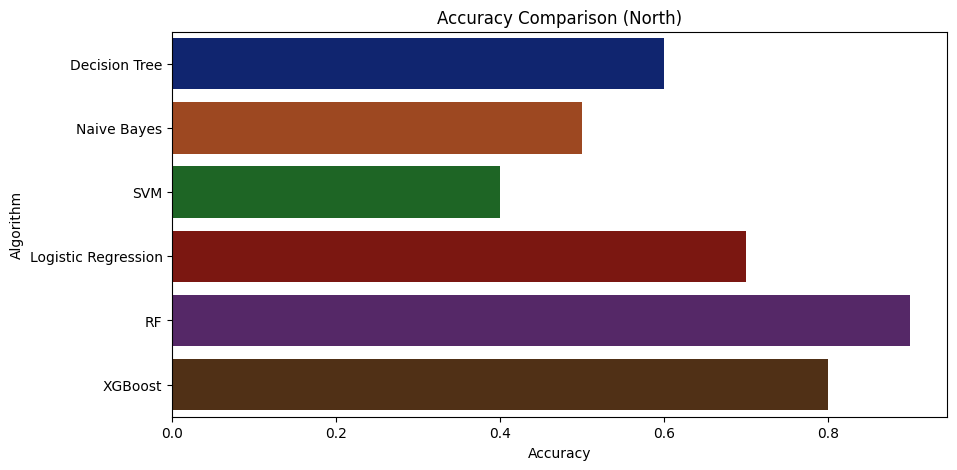

In [43]:
acc = [0.6,0.5,0.4,0.8,0.9,0.7]
model = ['Decision Tree', 'Naive Bayes', 'SVM', 'Logistic Regression', 'RF', 'XGBoost']
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison (North)')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [68]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9983333333333333
Naive Bayes --> 1.0
SVM --> 0.7908333333333334
Logistic Regression --> 1.0
RF --> 0.9991666666666666
XGBoost --> 0.9983333333333333


In [69]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['wheat']


In [71]:
data = np.array([[120,60, 40, 28, 82, 6.5, 140.91]])
prediction = RF.predict(data)
print(prediction)

['maize']
